## My first Jupyter python-R hybrid notebook
I got this inspiration from a blog post at Revolutions Analytics by Micheleen Harris: [`Pipelining R and Python in Notebooks`](http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html). 

For more examples of what Jupyter can do, please goto: http://jupyter-notebook.readthedocs.org/en/latest/examples/Notebook/rstversions/Examples%20and%20Tutorials%20Index.html

### To initiate R code, be sure to load this code below:

In [1]:
%load_ext rpy2.ipython

Here are some Python code:

In [2]:
import numpy as np

In [3]:
x = np.array([1, 2, 4, 6, 5, 8])
y = np.array([0, 1, 3, 2, 5, 7])

### Now some R code
**Using the `rmagic` syntax with `rpy2`.**
More documentation on `rpy2` here: http://rpy2.readthedocs.org/en/version_2.7.x/ 

`%R [-i INPUT] [-o OUTPUT] [-w WIDTH] [-h HEIGHT] [-d DATAFRAME] [-u {px,in,cm,mm}] [-r RES] [-p POINTSIZE] [-b BG] [-n] [code [code ...]]`

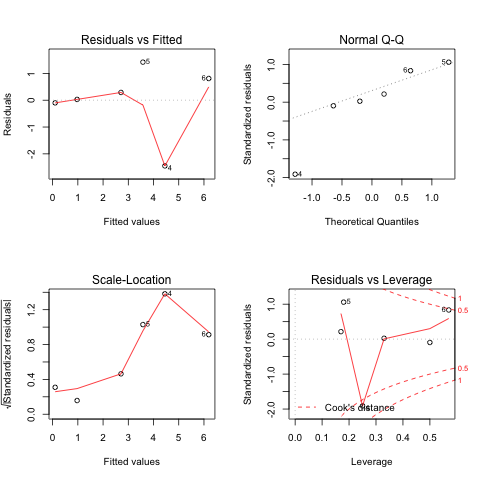

In [4]:
%%R -i x,y -o mycoef
xylm = lm(y~x)
mycoef = coef(xylm)
par(mfrow = c(2, 2))
plot(xylm)

In [5]:
print(mycoef)

[-0.77  0.87]


In [6]:
%%R
print(summary(xylm))
ls(xylm)
residuals(xylm)


Call:
lm(formula = y ~ x)

Residuals:
    1     2     3     4     5     6 
-0.10  0.03  0.29 -2.45  1.42  0.81 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.7700     1.2651  -0.609   0.5756  
x             0.8700     0.2565   3.392   0.0275 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.481 on 4 degrees of freedom
Multiple R-squared:  0.7421,	Adjusted R-squared:  0.6776 
F-statistic: 11.51 on 1 and 4 DF,  p-value: 0.02747

    1     2     3     4     5     6 
-0.10  0.03  0.29 -2.45  1.42  0.81 


### Here is a _ggplot_ graph
There seems to be some trivial warning so we mask it out first.

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
%R require(ggplot2)

array([1], dtype=int32)

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame({'Letter': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                   'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
                   'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

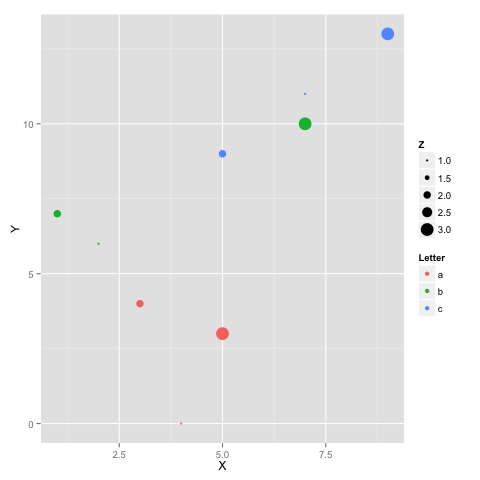

In [16]:
%%R -i df
ggplot(data = df) + geom_point(aes(x = X, y = Y, color = Letter, size = Z))

In [17]:
%%R 
library(ggvis) 
library(dplyr) 
p <- ChickWeight %>% ggvis(~Time, ~weight) %>% layer_points() 
print(p)


Error in library(ggvis) : there is no package called ‘ggvis’


### Some example of inline _Tex_ equation
This expression $\sqrt{3x-1}+(1+x)^2$  is an example of a TeX inline equation in a [Markdown-formatted](http://daringfireball.net/projects/markdown/) sentence.

Somehow I see a vertical line after the equation and before the `is an example`. Do you see it as well?